# Section 27.2.2 Ultimate Technologies

# Part 1 ‑ Exploratory data analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute
time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [1]:
# packages
import matplotlib.pyplot as plt
import numpy             as np
import os
import pandas            as pd
import seaborn           as sns
import warnings

from datetime                  import datetime
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.impute            import SimpleImputer
from sklearn.linear_model      import LinearRegression
from sklearn.linear_model      import LogisticRegression
from sklearn.model_selection   import train_test_split, GridSearchCV
from sklearn.pipeline          import make_pipeline
from sklearn.preprocessing     import StandardScaler

#import json

#from sklearn import model_selection
#from sklearn import linear_model, tree, discriminant_analysis, naive_bayes, ensemble, gaussian_process
#from sklearn.preprocessing import LabelEncoder
#from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
#from sklearn.metrics import log_loss, confusion_matrix
#from sklearn.feature_selection import RFE
#from sklearn.metrics import brier_score_loss, roc_auc_score
#from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
#from sklearn.dummy import DummyRegressor
#from sklearn.naive_bayes import GaussianNB
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
#from sklearn.calibration import CalibratedClassifierCV as CCV
#from sklearn.neural_network import MLPClassifier
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.feature_selection import f_regression
#from sklearn.preprocessing import MinMaxScaler
#from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
#import xgboost as xgb

In [2]:
# read file
logins = pd.read_json('logins.json')

In [3]:
logins.info()
logins.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
logins['count']=1
logins.head()

,login_time,count
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1


In [5]:
login15 = logins.resample("15min", on="login_time").sum()
login15.info()
login15.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   9788 non-null   int64
dtypes: int64(1)
memory usage: 152.9 KB


,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


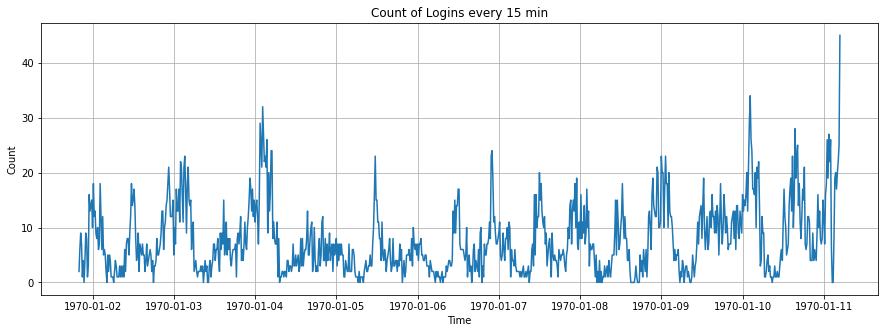

In [6]:
plt.figure(figsize=(15,5))
plt.plot(login15[0:900])
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Count of Logins every 15 min')
plt.grid(True)

In [7]:
loginhour = logins.resample("H", on="login_time").sum()
loginhour.info()
loginhour.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2447 entries, 1970-01-01 20:00:00 to 1970-04-13 18:00:00
Freq: H
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   2447 non-null   int64
dtypes: int64(1)
memory usage: 38.2 KB


,count
login_time,
1970-01-01 20:00:00,24
1970-01-01 21:00:00,9
1970-01-01 22:00:00,21
1970-01-01 23:00:00,58
1970-01-02 00:00:00,53


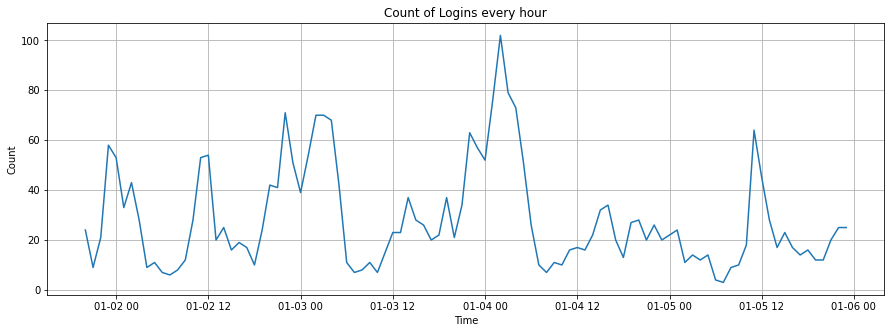

In [8]:
plt.figure(figsize=(15,5))
plt.plot(loginhour[0:100])
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Count of Logins every hour')
plt.grid(True)

In [9]:
loginhour.reset_index(inplace=True)
loginhour['hour'] = loginhour['login_time'].dt.hour
loginhour['day']  = loginhour['login_time'].dt.day_name()
loginhour.head()

,login_time,count,hour,day
0,1970-01-01 20:00:00,24,20,Thursday
1,1970-01-01 21:00:00,9,21,Thursday
2,1970-01-01 22:00:00,21,22,Thursday
3,1970-01-01 23:00:00,58,23,Thursday
4,1970-01-02 00:00:00,53,0,Friday


In [10]:
loginsday = loginhour.groupby("day").sum()[["count"]]
loginsday.reset_index(inplace=True)
loginsday.sort_values(by='count',inplace=True)

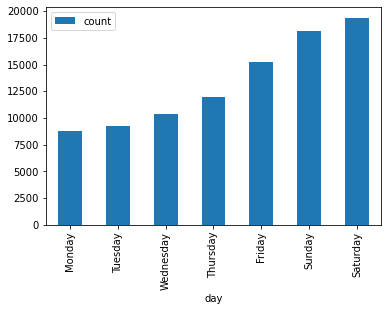

In [11]:
loginsday.plot.bar(x='day', y='count')

**- Logins increase daily from Mon to Fri and are the highest on Sat and Sun.** 
<br>
<br>

In [12]:
loginshour = loginhour.groupby("hour").sum()[["count"]]
loginshour.reset_index(inplace=True)
loginshour

,hour,count
0,0,5993
1,1,6317
2,2,5800
3,3,4831
4,4,5034
5,5,2945
6,6,1138
7,7,815
8,8,818
9,9,1527


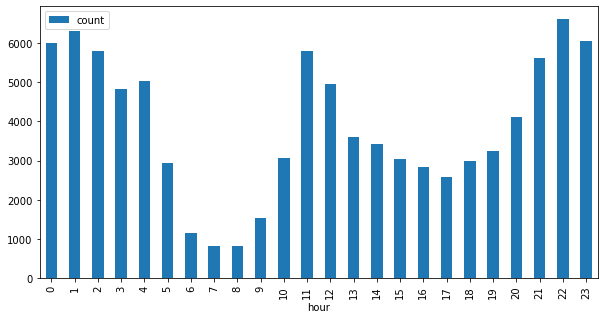

In [13]:
loginshour.plot.bar(x='hour', y='count', figsize=(10,5))

**- Logins are highest at 11am and 10 pm.** 
<br>
<br>
<br>

# Part 2 ‑ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two way
toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?

>##### - Maximize the total number of trips.  


2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:<br>

>a. how you will implement the experiment <br>
>>##### - Collect source and target destinations.
>>##### - Offer as many of the drivers the toll refund between the two cities for three months as expenses allow<br>

>b. what statistical test(s) you will conduct to verify the significance of the
observation<br>
>>##### - Chi square and t-test

>c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.
>>##### - If the results are significant (total trips increase a certain percent), the city should do a trial run refunding the tolls.
>>##### - Caveats include understanding that revenue from toll refunds could mean lower total revenue for each city.


# Part 3 ‑ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.

The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?<br>
>##### 83% of the observed users were retained.
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
>##### I chose RandomForest because it tends to handle highly correlated features well, where as a linear regression model would not. It is also used as an efficient way to investigate the importance of a set of features with a large data set.<br>

3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its longterm rider retention (again, a few sentences will suffice).
>##### The model shows that avg distance, weekday pct, and avg rating by driver are great indicators of whether a user will remain active for 30 days. The company can focus on these features when trying to market to new users.



### Data description
- **city:** city this user signed up
- **phone:** primary device for this user
- **signup_date:** date of account registration; in the form ‘YYYY MM DD’
- **last_trip_date:** the last time this user completed a trip; in the form ‘YYYY MM DD’
- **avg_dist:** the average distance in miles per trip taken in the first 30 days after signup
- **avg_rating_by_driver:** the rider’s average rating over all of their trips
- **avg_rating_of_driver:** the rider’s average rating of their drivers over all of their trips
- **surge_pct:** the percent of trips taken with surge multiplier > 1
- **avg_surge:** The average surge multiplier over all of this user’s trips
- **trips_in_first_30_days:** the number of trips this user took in the first 30 days after
signing up
- **ultimate_black_user:** TRUE if the user took an Ultimate Black in their first 30 days;
FALSE otherwise
- **weekday_pct:** the percent of the user’s trips occurring during a weekday

In [14]:
# read file
data = pd.read_json('ultimate_data_challenge.json')

In [15]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [16]:
data = data.dropna(axis=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 0 to 49998
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    41445 non-null  object 
 1   trips_in_first_30_days  41445 non-null  int64  
 2   signup_date             41445 non-null  object 
 3   avg_rating_of_driver    41445 non-null  float64
 4   avg_surge               41445 non-null  float64
 5   last_trip_date          41445 non-null  object 
 6   phone                   41445 non-null  object 
 7   surge_pct               41445 non-null  float64
 8   ultimate_black_user     41445 non-null  bool   
 9   weekday_pct             41445 non-null  float64
 10  avg_dist                41445 non-null  float64
 11  avg_rating_by_driver    41445 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 3.8+ MB


In [17]:
data['signup_date']    = pd.to_datetime(data['signup_date'])
data['last_trip_date'] = pd.to_datetime(data['last_trip_date'])
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 0 to 49998
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    41445 non-null  object        
 1   trips_in_first_30_days  41445 non-null  int64         
 2   signup_date             41445 non-null  datetime64[ns]
 3   avg_rating_of_driver    41445 non-null  float64       
 4   avg_surge               41445 non-null  float64       
 5   last_trip_date          41445 non-null  datetime64[ns]
 6   phone                   41445 non-null  object        
 7   surge_pct               41445 non-null  float64       
 8   ultimate_black_user     41445 non-null  bool          
 9   weekday_pct             41445 non-null  float64       
 10  avg_dist                41445 non-null  float64       
 11  avg_rating_by_driver    41445 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [18]:
last_trip_date_max = data['last_trip_date'].max()
print(last_trip_date_max)

2014-07-01 00:00:00


In [19]:
data['active'] = data['last_trip_date'].apply(lambda last_trip_date: 0 if (last_trip_date_max - last_trip_date).days > 30 else 1)
data

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,Astapor,3,2014-01-03,4.8,1.11,2014-07-01,iPhone,11.1,True,55.6,2.53,4.7,1
49994,Astapor,1,2014-01-03,4.6,1.44,2014-05-31,iPhone,37.5,False,25.0,2.25,4.5,0
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2,1
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0,0


In [20]:
data['phone']               = np.where(data['phone']=='Android', 1, 0)
data['ultimate_black_user'] = np.where(data['ultimate_black_user']==True, 1, 0)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 0 to 49998
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    41445 non-null  object        
 1   trips_in_first_30_days  41445 non-null  int64         
 2   signup_date             41445 non-null  datetime64[ns]
 3   avg_rating_of_driver    41445 non-null  float64       
 4   avg_surge               41445 non-null  float64       
 5   last_trip_date          41445 non-null  datetime64[ns]
 6   phone                   41445 non-null  int32         
 7   surge_pct               41445 non-null  float64       
 8   ultimate_black_user     41445 non-null  int32         
 9   weekday_pct             41445 non-null  float64       
 10  avg_dist                41445 non-null  float64       
 11  avg_rating_by_driver    41445 non-null  float64       
 12  active                  41445 non-null  int64 

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,0,15.4,1,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,1,0.0,0,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,0,0.0,0,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,0,20.0,1,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,1,11.8,0,82.4,3.13,4.9,0


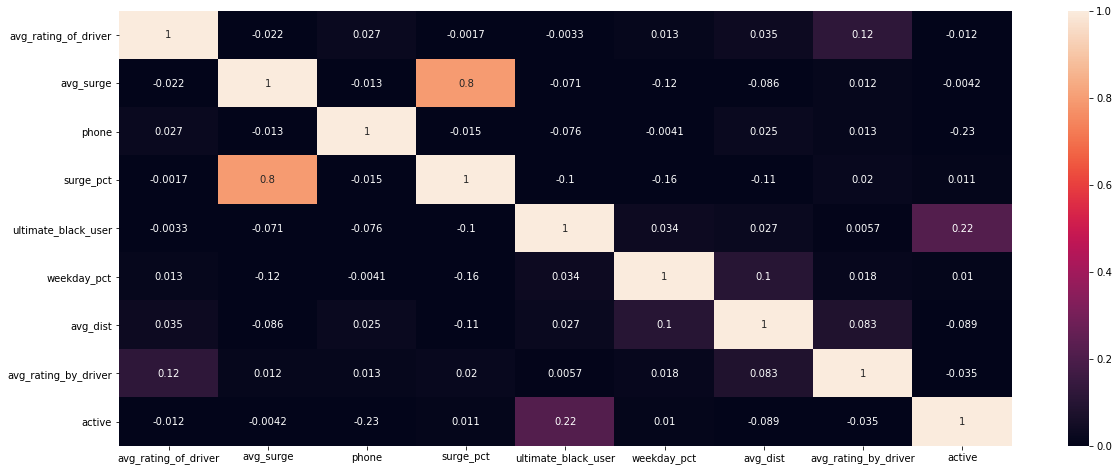

In [21]:
feature_cols = data[['avg_rating_of_driver',
                         'avg_surge',
                         'phone',
                         'surge_pct',
                         'ultimate_black_user',
                         'weekday_pct',
                         'avg_dist', 
                         'avg_rating_by_driver', 
                         'active']]

plt.subplots(figsize=(20,8))
sns.heatmap(feature_cols.corr(), annot=True, vmin=0, vmax=1);

In [22]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['active','city','signup_date','last_trip_date']),data.active,test_size=0.3, random_state=42)

In [23]:
data2 = pd.get_dummies(data)
data2

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active,city_Astapor,city_King's Landing,city_Winterfell
0,4,2014-01-25,4.7,1.10,2014-06-17,0,15.4,1,46.2,3.67,5.0,1,0,1,0
1,0,2014-01-29,5.0,1.00,2014-05-05,1,0.0,0,50.0,8.26,5.0,0,1,0,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0,0.0,0,100.0,0.77,5.0,0,1,0,0
3,9,2014-01-10,4.6,1.14,2014-06-29,0,20.0,1,80.0,2.36,4.9,1,0,1,0
4,14,2014-01-27,4.4,1.19,2014-03-15,1,11.8,0,82.4,3.13,4.9,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,3,2014-01-03,4.8,1.11,2014-07-01,0,11.1,1,55.6,2.53,4.7,1,1,0,0
49994,1,2014-01-03,4.6,1.44,2014-05-31,0,37.5,0,25.0,2.25,4.5,0,1,0,0
49995,0,2014-01-25,5.0,1.00,2014-06-05,0,0.0,0,100.0,5.63,4.2,1,0,1,0
49997,0,2014-01-31,5.0,1.00,2014-05-22,1,0.0,1,100.0,3.86,5.0,0,0,0,1


In [24]:
#from sklearn.model_selection import train_test_split

y = data['active']
X = data2.drop(['active','signup_date','last_trip_date'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [25]:
#scale data
from sklearn import preprocessing
import numpy as np
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [26]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from matplotlib import pyplot

In [27]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)
model_res = clf.fit(X_train_scaled, y_train)
y_pred = model_res.predict(X_test_scaled)
y_pred_prob = model_res.predict_proba(X_test_scaled)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.755
Random Forest: f1-score=0.755


>##### - Overall Accuracy of 75%

12


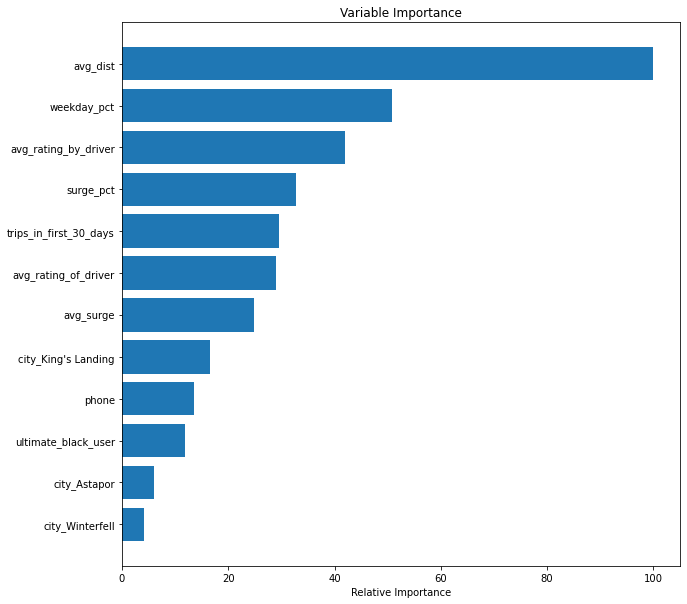

In [28]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()